In [1]:
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# @title Load Configuraiton 
import hbqaconfig
conf = hbqaconfig.setEnv('local')
# for k,v in conf.items(): print (k,":",v)

In [3]:
# This chunk was created to use with ChatGPT Front End to create prompt for generating QA.
# At this point of time there was no clarity around chunk size, number of question, types of question, \
# as per initial investigation cost of ChatGPT API was very high. So intially this Chunk was created. \
# Unfortuntely the main file is lost. But the prompt created from those chunks still exists. So, after\
#  reverse engineering, created Chunk from the Prompt text.

# FileToProcess = '05-QAGen_ChatGPT_FE-Created-14Sep23-(ManualStep).csv' #Based on Chapter 1. Don't use.
FileToProcess = '04.2-Chunk_with_Prompts+ChatGPT_Response.csv' #This is based on Chapter 3 & 4.
df_qa= pd.read_csv(conf['PE_FOLDER']+FileToProcess) #This CSV is created from google drive file. It has Chunk info.

print(df_qa.shape)
df_qa = df_qa.loc[df_qa['ChatGPT_Response'].notna(),:]

df_qa = df_qa.loc[df_qa['ChatGPT_Response'].str.len()>10,:]
print(df_qa.shape)
df_qa.sample(4)

(1697, 9)
(334, 9)


,Section_Id,Chunk_Id,Chunk_Letters,Chunk_Words,Chunk_Approx_Tokens,Chunk,Prompt,ChatGPT_Response,1106
307,Book03_109,521,3137,561,746,"Section CIX\n""Lomasa said, 'The blessed God ha...","Write 4 unique questions, corresponding answer...",Question 1: Who agreed to sustain the descent ...,4.0
228,Book03_009,397,3437,622,827,"Section IX\n""Dhritarashtra said, 'O holy one, ...","Write 4 unique questions, corresponding answer...",Question 1: Why did Dhritarashtra consent to t...,4.0
369,Book03_198,638,4374,802,1067,"Section CLXLVIII\nVaisampayana said, ""The sons...","Write 5 unique questions, corresponding answer...",Question 1: Who is the royal sage mentioned in...,5.0
337,Book03_145,565,3163,549,730,"""On those sounds being heard the down of Bhima...","Write 4 unique questions, corresponding answer...",Question 1: How did Bhima react when he heard ...,4.0


In [13]:
df_hbqa_manual = pd.DataFrame(columns=['Ques_Id','Chunk_Id','Section_Id', 'Question','Ref_Answer','Chunk','Reference'])
df_hbqa_manual

,Ques_Id,Chunk_Id,Section_Id,Question,Ref_Answer,Chunk,Reference


In [14]:
rowid=0
for row in df_qa.index: # For dataset

    chunk = df_qa.loc[row,'Chunk'].strip()
    section_id = df_qa.loc[row,'Section_Id']
    chunk_id = df_qa.loc[row,'Chunk_Id']

    qa_text = df_qa.loc[row,'ChatGPT_Response'].strip() #.replace('Questions:','')
    qas = qa_text.split('\r\n\r\n')
    # print(len(qas))
    # print(qas)
    # break
    # print('outer')
    for qa in qas: # For Each row, it has 5 question
        # print('\tInner')
        text1=qa.split('\n')
        # print( "\t" , len(text1))
        # text2=text1.split('\n')
        # print(text1)
        # break
        ques = text1[0].split(":")[1].strip()
        ans  = text1[1].split(":")[1].strip()
        # print(len(text1))
        if len(text1)<3:
            print(chunk_id)
            break
        else:
            ref  = text1[2].split(":")[1].strip()
        # print(ques)
        # print(ans)
    
        # if len(text1)==3:
        #     ques = text1[0].split(":")[1].strip()
        #     ans  = text1[1].split(":")[1].strip()
        #     ref  = text1[2].split(":")[1].strip()
        # elif len(text1)==4:
        #     ques = text1[1][3:].strip()
        #     ans  = text1[2][3:].strip()
        #     ref  = text1[3][3:].strip()
        # else:
        #     ques=""
        #     ans =""
        #     ref =""
        #     print(text1[3])

        if ques!="":
            qa_row = rowid, chunk_id, section_id, ques, ans, chunk, ref
            #print(qa_row)
            
            df_hbqa_manual.loc[rowid] = qa_row
            rowid+=1
              


824
909
912


In [15]:
print(df_hbqa_manual.shape)
df_hbqa_manual

(1102, 7)


,Ques_Id,Chunk_Id,Section_Id,Question,Ref_Answer,Chunk,Reference
0,0,389,Book03_002,What is the significance of performing the Agn...,Performing the Agnihotra is considered importa...,Even this is eternal morality. They that perfo...,The significance of the Agnihotra and the cons...
1,1,390,Book03_003,"What predicament does Yudhishthira face, and h...",Yudhishthira faces the predicament of being un...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's predicament and his consultatio...
2,2,390,Book03_003,What advice does Dhaumya offer to Yudhishthira...,Dhaumya advises Yudhishthira to take refuge in...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Dhaumya's advice to Yudhishthira is provided i...
3,3,390,Book03_003,"How did Yudhishthira adore the sun, and what i...",Yudhishthira adored the sun by performing ablu...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's adoration of the sun and the si...
4,4,390,Book03_003,What are the hundred and eight names of the su...,"The hundred and eight names of the sun, as rev...","Section III\n""Vaisampayana said, 'Yudhishthira...",The list of the hundred and eight names of the...
...,...,...,...,...,...,...,...
1097,1097,949,Book05_071,"In this passage, how does Dhritarashtra descri...",Dhritarashtra describes Lord Krishna (Vasudeva...,"Section LXXI\n""Dhritarashtra said, 'O Sanjaya,...","""Dhritarashtra said, 'O Sanjaya, I envy those ..."
1098,1098,952,Book05_072,What does Yudhishthira request of Krishna in t...,Yudhishthira requests Krishna to go to the Kur...,"""Yudhishthira said, 'Do, O Krishna, as it plea...","""Yudhishthira said, 'Do, O Krishna, as it plea..."
1099,1099,961,Book05_081,What is Sahadeva's desire and the reason behin...,Sahadeva desires to provoke a war with the Kau...,"Section LXXXI\n""Sahadeva said, 'What hath been...","""What hath been said by the king is, indeed, e..."
1100,1100,974,Book05_090,How did Kunti respond to Krishna's counsel reg...,Kunti responded by placing her full trust in K...,"Thus consoled by Krishna, Kunti, afflicted wit...","""Thus consoled by Krishna, Kunti... 'I know, O..."


In [ ]:
# # To avoid duplication with API generted questions. 
# df_hbqa_manual['Ques_Id'] = df_hbqa_manual['Ques_Id']+10000
# df_hbqa_manual['Chunk_Id'] = df_hbqa_manual['Chunk_Id']+10000

In [16]:
df_hbqa_manual['WordsInQues'] = df_hbqa_manual['Question'].str.split(' ').apply(len)
df_hbqa_manual['WordsInAns']  = df_hbqa_manual['Ref_Answer'].str.split(' ').apply(len)
df_hbqa_manual['WordsInRef']  = df_hbqa_manual['Reference'].str.split(' ').apply(len)
df_hbqa_manual['WordsInChunk']  = df_hbqa_manual['Chunk'].str.split(' ').apply(len)
df_hbqa_manual.head(5)

,Ques_Id,Chunk_Id,Section_Id,Question,Ref_Answer,Chunk,Reference,WordsInQues,WordsInAns,WordsInRef,WordsInChunk
0,0,389,Book03_002,What is the significance of performing the Agn...,Performing the Agnihotra is considered importa...,Even this is eternal morality. They that perfo...,The significance of the Agnihotra and the cons...,16,50,50,809
1,1,390,Book03_003,"What predicament does Yudhishthira face, and h...",Yudhishthira faces the predicament of being un...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's predicament and his consultatio...,14,41,53,852
2,2,390,Book03_003,What advice does Dhaumya offer to Yudhishthira...,Dhaumya advises Yudhishthira to take refuge in...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Dhaumya's advice to Yudhishthira is provided i...,10,51,30,852
3,3,390,Book03_003,"How did Yudhishthira adore the sun, and what i...",Yudhishthira adored the sun by performing ablu...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's adoration of the sun and the si...,14,59,28,852
4,4,390,Book03_003,What are the hundred and eight names of the su...,"The hundred and eight names of the sun, as rev...","Section III\n""Vaisampayana said, 'Yudhishthira...",The list of the hundred and eight names of the...,16,42,23,852


In [17]:
df_hbqa_manual.to_csv(conf['QAGS_FOLDER'] + '06-HBQA_Manual_with_Chunk.csv', index=None)

print(df_hbqa_manual.shape)
df_hbqa_manual.head(5)

(1102, 11)


,Ques_Id,Chunk_Id,Section_Id,Question,Ref_Answer,Chunk,Reference,WordsInQues,WordsInAns,WordsInRef,WordsInChunk
0,0,389,Book03_002,What is the significance of performing the Agn...,Performing the Agnihotra is considered importa...,Even this is eternal morality. They that perfo...,The significance of the Agnihotra and the cons...,16,50,50,809
1,1,390,Book03_003,"What predicament does Yudhishthira face, and h...",Yudhishthira faces the predicament of being un...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's predicament and his consultatio...,14,41,53,852
2,2,390,Book03_003,What advice does Dhaumya offer to Yudhishthira...,Dhaumya advises Yudhishthira to take refuge in...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Dhaumya's advice to Yudhishthira is provided i...,10,51,30,852
3,3,390,Book03_003,"How did Yudhishthira adore the sun, and what i...",Yudhishthira adored the sun by performing ablu...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's adoration of the sun and the si...,14,59,28,852
4,4,390,Book03_003,What are the hundred and eight names of the su...,"The hundred and eight names of the sun, as rev...","Section III\n""Vaisampayana said, 'Yudhishthira...",The list of the hundred and eight names of the...,16,42,23,852


In [121]:
# Find start of answer (using reference) into chunk.
# This will not work because of generative answer. So dropping this idea.
# Due to this Encoder and Decoder transformers cannot be used for Fintuning this project's QA work

# def find_start(reference, chunk):
#     reference1 = reference.split('"')
#     if len(reference1)>1:
#         reference1 = reference1[1][0:30]
#     else:
#         reference1="something else"

#     print(reference1)
#     return chunk.find(reference1)

# df_hbqa_manual['Start'] = df_hbqa_manual.apply(lambda row: find_start(row['Reference'], row['Chunk']), axis=1)

# df_hbqa_manual['Start']



In [18]:
df=pd.read_csv(conf['QAGS_FOLDER'] + '06-HBQA_Manual_with_Chunk.csv')
df.set_index(df['Ques_Id'], inplace=True)
df.head(3)

,Ques_Id,Chunk_Id,Section_Id,Question,Ref_Answer,Chunk,Reference,WordsInQues,WordsInAns,WordsInRef,WordsInChunk
Ques_Id,,,,,,,,,,,
0,0,389,Book03_002,What is the significance of performing the Agn...,Performing the Agnihotra is considered importa...,Even this is eternal morality. They that perfo...,The significance of the Agnihotra and the cons...,16,50,50,809
1,1,390,Book03_003,"What predicament does Yudhishthira face, and h...",Yudhishthira faces the predicament of being un...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Yudhishthira's predicament and his consultatio...,14,41,53,852
2,2,390,Book03_003,What advice does Dhaumya offer to Yudhishthira...,Dhaumya advises Yudhishthira to take refuge in...,"Section III\n""Vaisampayana said, 'Yudhishthira...",Dhaumya's advice to Yudhishthira is provided i...,10,51,30,852


In [19]:
df['WordsInQues+Chunk']= df['WordsInQues'] + df['WordsInChunk']

In [20]:
df.describe([.50,.75,.90,.95,.98,.99])

,Ques_Id,Chunk_Id,WordsInQues,WordsInAns,WordsInRef,WordsInChunk,WordsInQues+Chunk
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,550.500000,580.468240,16.450998,47.477314,40.039020,699.405626,715.856624
std,318.264303,154.255154,4.421569,17.549746,17.540179,192.059207,191.317345
min,0.000000,27.000000,5.000000,11.000000,1.000000,127.000000,144.000000
50%,550.500000,566.000000,16.000000,45.000000,38.000000,723.000000,736.500000
75%,825.750000,700.000000,19.000000,57.000000,50.000000,852.000000,866.000000
90%,990.900000,783.900000,22.900000,70.000000,63.000000,928.000000,946.000000
95%,1045.950000,812.000000,24.000000,78.000000,72.000000,964.000000,981.000000
98%,1078.980000,830.000000,26.000000,89.000000,82.000000,981.980000,998.000000
99%,1089.990000,841.920000,27.000000,98.000000,88.990000,984.000000,1002.980000


In [ ]:
# While model fine tuning we need to keep in mind Question + Chunk len in words can be max 1021. 
# But if we keep is 1000 words, approx 1400 token then 98% of QA pair will be considered to full length.


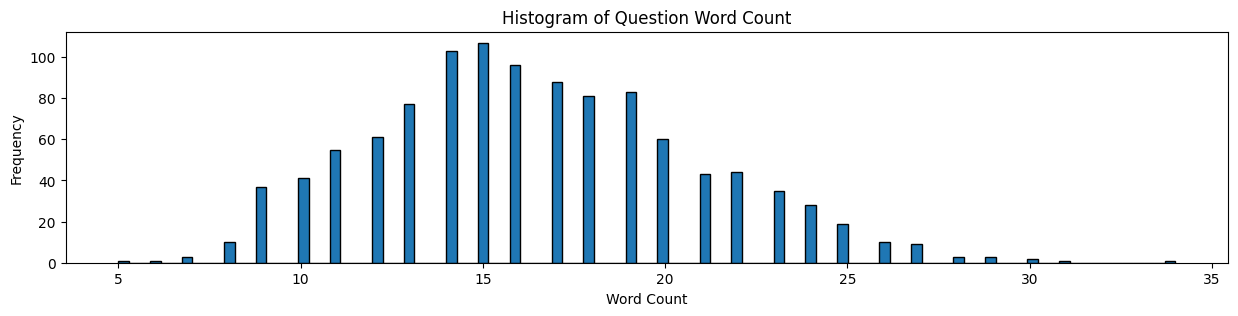

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInQues'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Question Word Count')
plt.show()

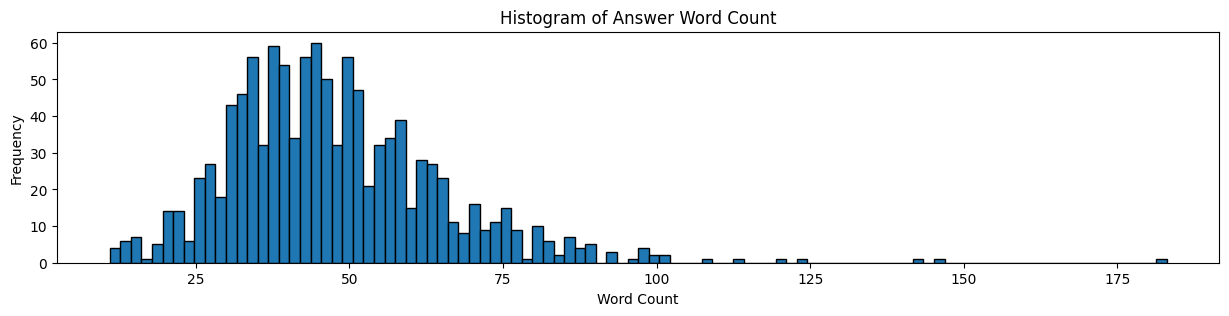

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInAns'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Answer Word Count')
plt.show()

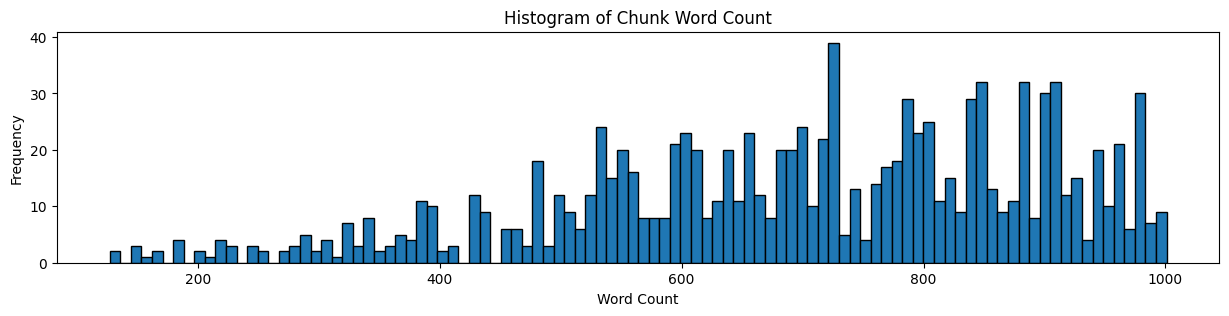

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInChunk'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Chunk Word Count')
plt.show()

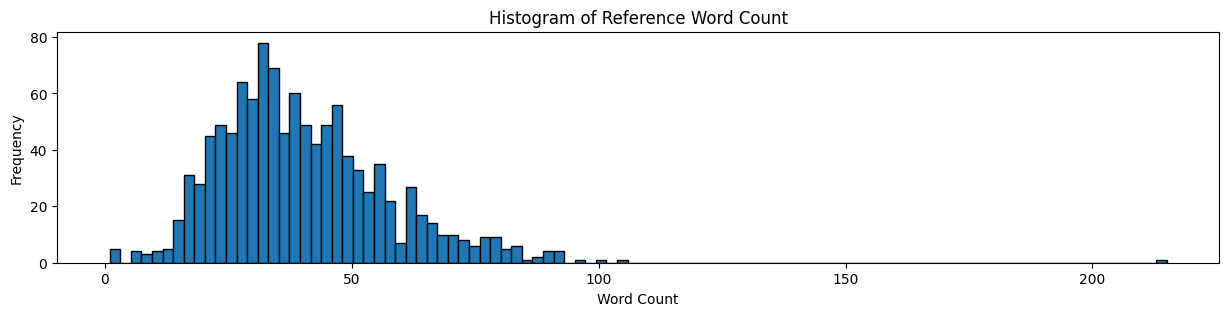

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInRef'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Reference Word Count')
plt.show()

In [56]:
# def getAnsStart(row):
#     start = row['Chunk'].lower().find(row['Reference'][0:20].lower())
#     ans_len = len(row['Ref_Answer'])
#     print(start, row['Chunk'][start:start+ans_len])
#     print('\t'+row['Ref_Answer'])
#     return start


# df['start'] = df.apply(getAnsStart, axis=1)